In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
seed = 855835128

In [19]:
file = pd.read_csv(r'E:\Auckland\2022 Semester 2\COMPSCI 760\Assignment\Presentation 2\ModelDf.csv',sep=',',usecols=[3,4,5,8])
#file = file.dropna()
data = file[['Gender','Occupation','Country']]
target = file['Manner.of.death']
print("The feature vectors:\n",data.head())
print("The predictive vector:\n",target.head())

The feature vectors:
   Gender  Occupation                  Country
0   Male  Politician  Italy; Kingdom of Italy
1   Male  Politician                    Ghana
2   Male      Artist                    Egypt
3   Male      Artist                   Canada
4   Male  Politician                   France
The predictive vector:
 0    natural causes
1    natural causes
2          accident
3          accident
4    natural causes
Name: Manner.of.death, dtype: object


In [20]:
# pre-processing data
data_T = data.T
arr1 = data_T.to_numpy()
temp = np.zeros((3,len(data)))
le1 = preprocessing.LabelEncoder()
for i in range(len(arr1)):
    le1.fit(arr1[i])
    temp[i] = le1.transform(arr1[i])
x_T = pd.DataFrame(temp)
x = x_T.T
x = x.to_numpy()

arr2 = target.to_numpy()
le2 = preprocessing.LabelEncoder()
le2.fit(arr2)
y = le2.transform(arr2)
# The result of pre-processing
print("The feature vectors:\n",x)
print("The predictive vector:\n",y)

The feature vectors:
 [[  1. 272. 143.]
 [  1. 272. 106.]
 [  1.  26.  74.]
 ...
 [  0.  91. 357.]
 [  0. 272. 316.]
 [  1.  30. 201.]]
The predictive vector:
 [8 8 0 ... 8 8 8]


In [4]:
# calculate Gini and Enrtopy
DT = DecisionTreeClassifier(random_state = seed)
score = cross_val_score(DT,x,y,cv=2).mean()
print('Gini: %.4f'%score)
DT = DecisionTreeClassifier(criterion = 'entropy',random_state = seed)
score = cross_val_score(DT,x,y,cv=2).mean()
print('Entropy: %.4f'%score)

Gini: 0.7576
Entropy: 0.7674


Entropy is better than Gini in this data set.

The optimal parameters and the highest score:
 [10.          0.80669183]


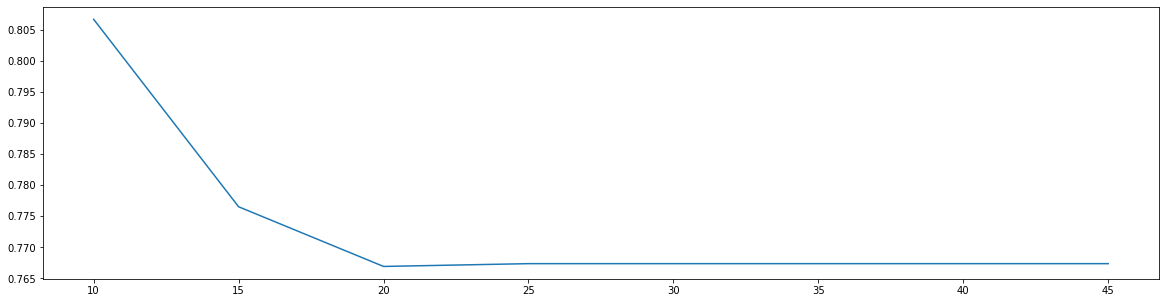

In [5]:
ScoreAll = []
for i in range(10,50,5):
    DT = DecisionTreeClassifier(max_depth = i,criterion = 'entropy',random_state = seed)
    score = cross_val_score(DT,x,y,cv = 2).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll == np.max(ScoreAll[:,1]))[0][0]
print("The optimal parameters and the highest score:\n",ScoreAll[max_score])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

The optimal parameters and the highest score:
 [2.        0.8353592]


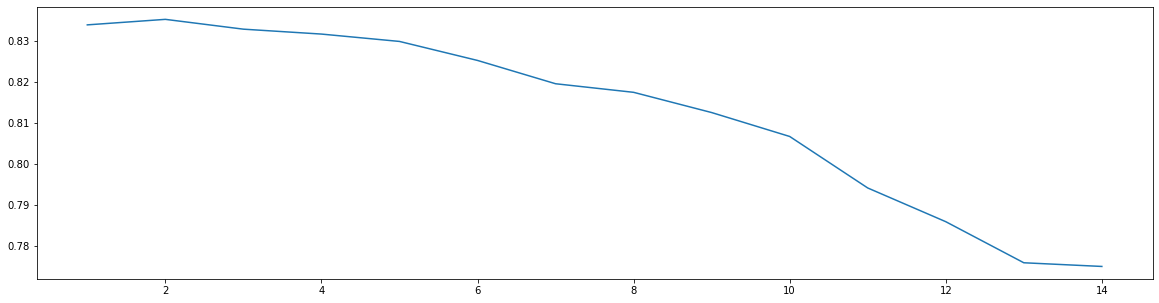

In [6]:
ScoreAll = []
for i in range(1,15):
    DT = DecisionTreeClassifier(max_depth = i,criterion = 'entropy',random_state = seed)
    score = cross_val_score(DT,x,y,cv = 2).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll == np.max(ScoreAll[:,1]))[0][0]
print("The optimal parameters and the highest score:\n",ScoreAll[max_score])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

The optimal parameters and the highest score:
 [2.        0.8353592]


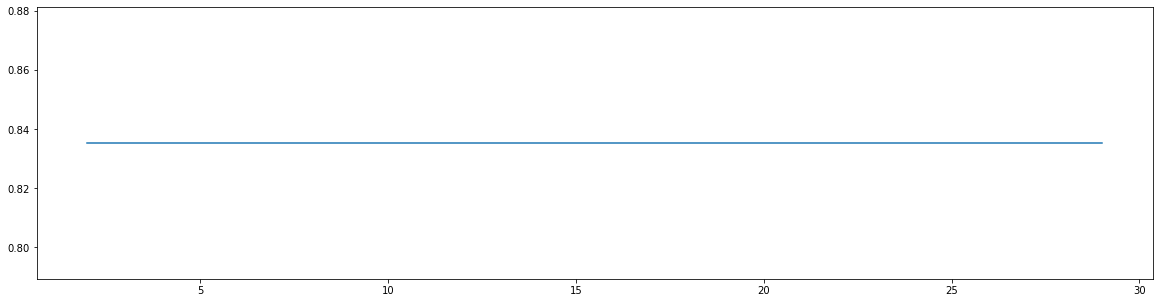

In [7]:
# consider min_samples_split
ScoreAll = []
for i in range(2,30):
    DT = DecisionTreeClassifier(max_depth = 2, min_samples_split = i,criterion = 'entropy',random_state = seed)
    score = cross_val_score(DT,x,y,cv=2).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll == np.max(ScoreAll[:,1]))[0][0]
print("The optimal parameters and the highest score:\n",ScoreAll[max_score])
plt.figure(figsize = [20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

There is no need to modify the min_samples_split parameter.

The optimal parameters and the highest score:
 [1.        0.8353592]


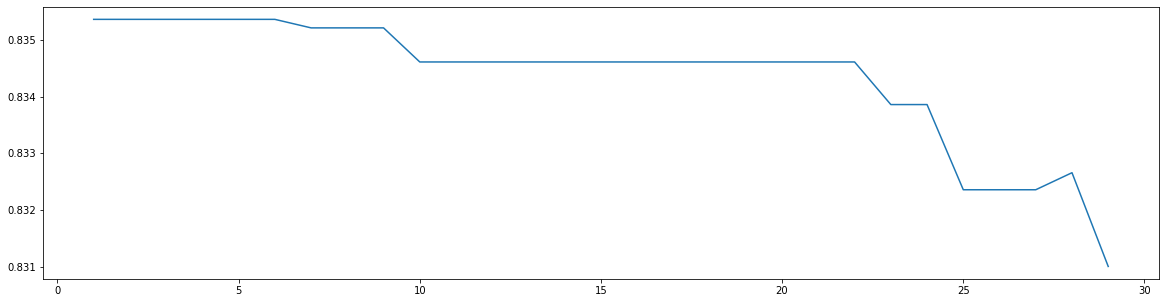

In [15]:
# consider min_samples_leaf
ScoreAll = []
for i in range(1,30):
    DT = DecisionTreeClassifier(min_samples_leaf = i, min_samples_split = 2,max_depth = 2,criterion = 'entropy',random_state = seed)
    score = cross_val_score(DT,x,y,cv=2).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll == np.max(ScoreAll[:,1]))[0][0]
print("The optimal parameters and the highest score:\n",ScoreAll[max_score])
plt.figure(figsize = [20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

In [16]:
# Entropy,max_depth = 2, min_samples_leaf = 1, min_samples_split = 2
param_grid = {
    'max_depth':np.arange(1,5),
    'min_samples_leaf':np.arange(1,7),
    'min_samples_split':np.arange(1,5)
}
DTC = DecisionTreeClassifier(criterion = 'entropy',random_state = seed)
GS = GridSearchCV(DTC,param_grid,cv=2)
GS.fit(x,y)
print(GS.best_params_)
print(GS.best_score_)

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.8353591962152618


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
48 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "D:\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn(som